https://www.jianshu.com/p/b190efae4d31

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### our data

In [2]:
# adata = sc.read('raw/expr_matrix_10day_log_normalized.txt')
adata = sc.read('raw/SCTransform_10day_pesudocell_matrix.txt')
adata.var_names_make_unique()

In [3]:
# select cells --- gene_nb between [200,4000]
sc.pp.filter_cells(adata, min_genes=1)
# adata = adata[adata.obs['n_genes'] < 4000, :]
# select genes --- present in [3,~] cells
sc.pp.filter_genes(adata, min_cells=1)
# adata = adata[:,adata.var['n_cells'] < 100]
adata

AnnData object with n_obs × n_vars = 1005 × 1000
    obs: 'n_genes'
    var: 'n_cells'

In [4]:
cell_nb_distribution = adata.var['n_cells']
gene_nb_distribution = adata.obs['n_genes']

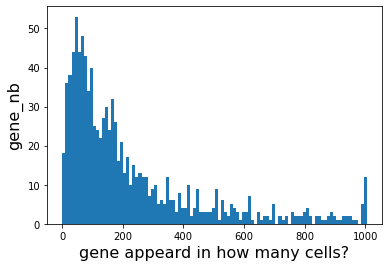

In [5]:
plt.hist(list(adata.var['n_cells']),100)
plt.xlabel('gene appeard in how many cells?',fontsize=16)
plt.ylabel('gene_nb',fontsize=16)
plt.show()

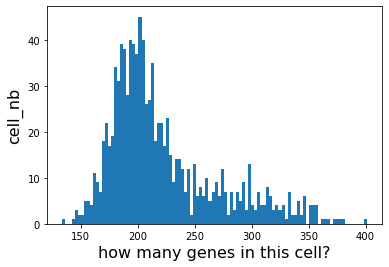

In [6]:
plt.hist(list(adata.obs['n_genes']),100)
plt.xlabel('how many genes in this cell?',fontsize=16)
plt.ylabel('cell_nb',fontsize=16)
plt.show()

In [7]:
sc.pp.highly_variable_genes(adata)
adata = adata[:, adata.var['highly_variable']]

c:\users\jiarong\appdata\local\programs\python\python37\lib\site-packages\scanpy\preprocessing\_utils.py:11: RuntimeWarning: overflow encountered in multiply
  mean_sq = np.multiply(X, X).mean(axis=axis, dtype=np.float64)
c:\users\jiarong\appdata\local\programs\python\python37\lib\site-packages\scanpy\preprocessing\_highly_variable_genes.py:240: RuntimeWarning: invalid value encountered in true_divide
  ) / disp_std_bin[df['mean_bin'].values].values


In [8]:
adata

View of AnnData object with n_obs × n_vars = 1005 × 152
    obs: 'n_genes'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg'

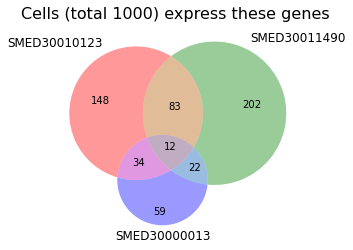

In [9]:
df = pd.read_csv('raw/SCTransform_10day_pesudocell_matrix.txt',sep=' ')
sub_df = df[['SMED30010123','SMED30011490','SMED30000013']]  # SMED30010123  SMED30000013  SMED30011490
sub_df.reset_index(drop=True, inplace=True)
sub_arr = sub_df.values

all_index = set([i for i in range(len(sub_arr))])
index_0 = set(np.argwhere(sub_arr[:,0]!=0).squeeze().tolist())
index_1 = set(np.argwhere(sub_arr[:,1]!=0).squeeze().tolist())
index_2 = set(np.argwhere(sub_arr[:,2]!=0).squeeze().tolist())

import matplotlib.pyplot as plt
from matplotlib_venn import venn3
plt.title('Cells (total 1000) express these genes ',fontsize = 16)
venn3(subsets = [{i for i in index_0},{i for i in index_1},{i for i in index_2}],
      set_labels=('SMED30010123', 'SMED30011490', 'SMED30000013'))

In [10]:
arr = df.values
for i in range(arr.shape[0]):
    for j in range(arr.shape[1]):
        arr[i,j] = int(arr[i,j]!=0)
        
# df.to_csv('raw/zero_or_one.txt',sep = ' ')